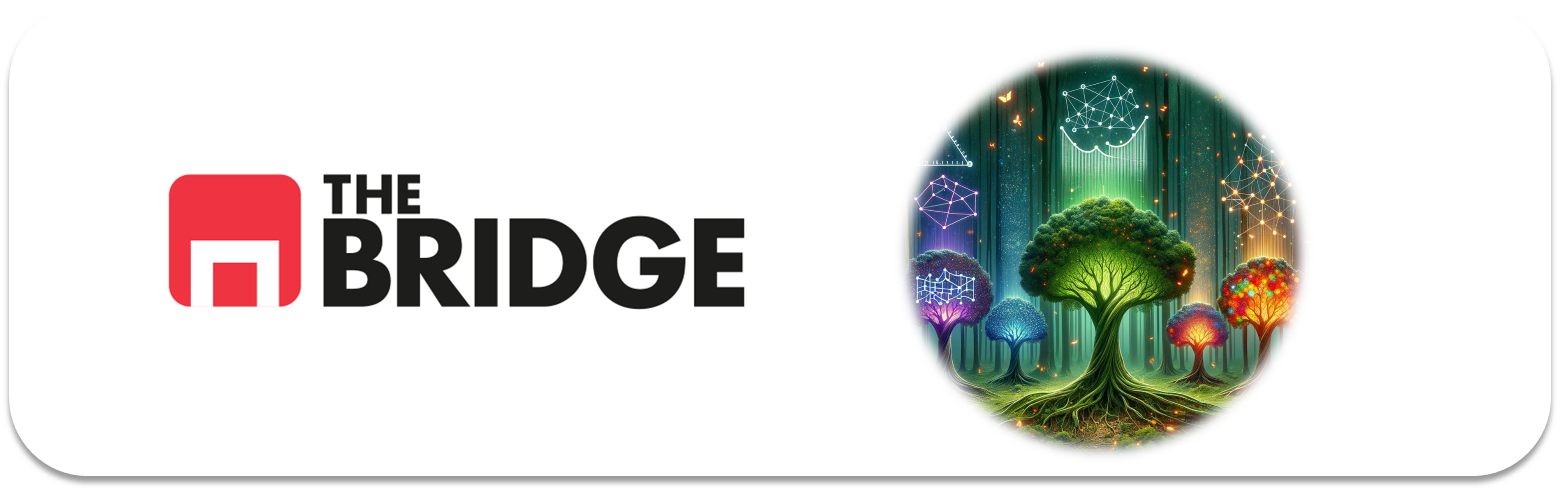

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import toolbox_ML as tb

np.random.seed(42)

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [34]:
# 1. Cargamos los datos

df_bank = pd.read_csv("./data/bank-full.csv", sep=';')
display(df_bank)
print(df_bank.info())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


Suscripción al depósito (valores absolutos):
y
no     39922
yes     5289
Name: count, dtype: int64

Suscripción al depósito (porcentajes):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


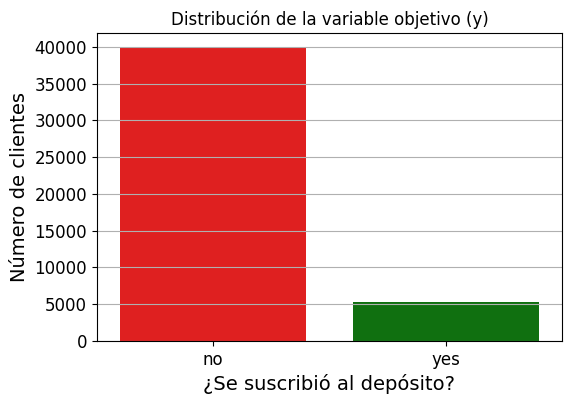

In [35]:
# 2. Análisis de la variable objetivo (y)

# Frecuencia absoluta
print("Suscripción al depósito (valores absolutos):")
print(df_bank["y"].value_counts())

# Frecuencia relativa
print("\nSuscripción al depósito (porcentajes):")
print(df_bank["y"].value_counts(normalize=True) * 100)

# Gráfico
plt.figure(figsize=(6, 4))
sns.countplot(data=df_bank, x="y", hue="y", palette={"no": "red", "yes": "green"})
plt.title("Distribución de la variable objetivo (y)")
plt.xlabel("¿Se suscribió al depósito?")
plt.ylabel("Número de clientes")
plt.grid(axis="y")
plt.show()

In [36]:
# 3. Limpieza y preprocesado

# Aunque no hay nulos, en la visualización inicial vemos que hay datos inputados como "unknown". Así que teniendo eso en cuenta, limpiemos el dataset:

unknowns = (df_bank == "unknown").sum()
unknowns = unknowns[unknowns > 0]

print("Columnas con valores 'unknown':")
print(unknowns)

Columnas con valores 'unknown':
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


In [37]:
# Vamos a eliminar poutcome porque el % de nulos es altísimo y contact porque, aunque no hay tantos, sigue siendo una proporción alta, y no es una variable que creemos que vaya a aportar mucho.
# Las otras dos columnas las dejamos como están.

df_bank.drop(columns=["poutcome", "contact"], inplace=True)

In [38]:
# 4. Tipificamos

tb.tipifica_variables(df_bank)

,nombre_variable,tipo_sugerido
0,age,Numerica Discreta
1,job,Numerica Discreta
2,marital,Categorica
3,education,Categorica
4,default,Binaria
5,balance,Numerica Discreta
6,housing,Binaria
7,loan,Binaria
8,day,Numerica Discreta
9,month,Numerica Discreta


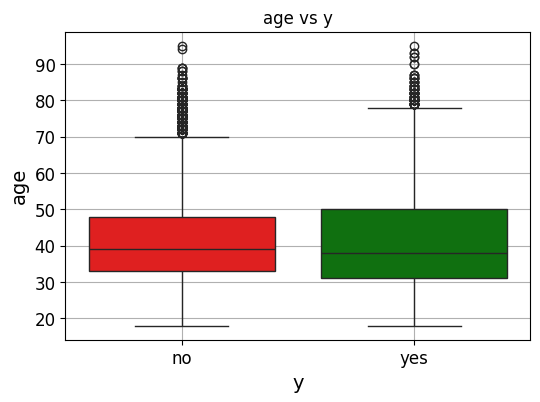

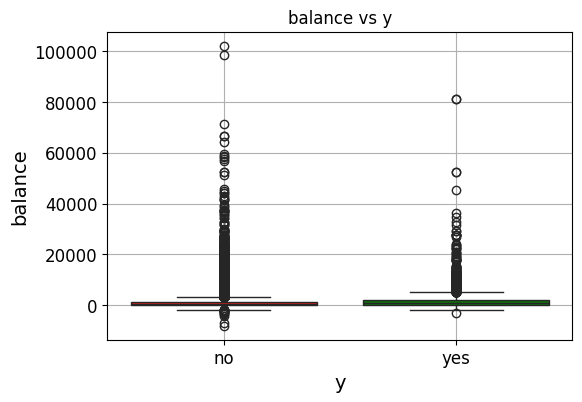

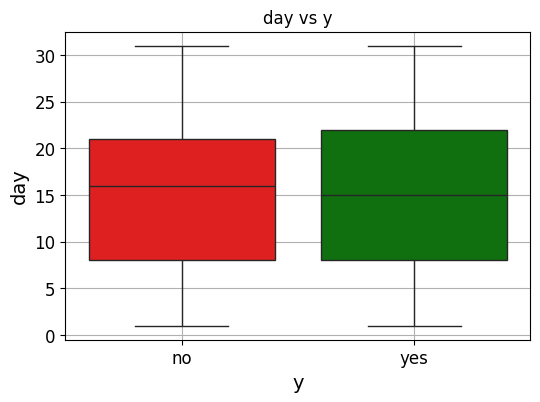

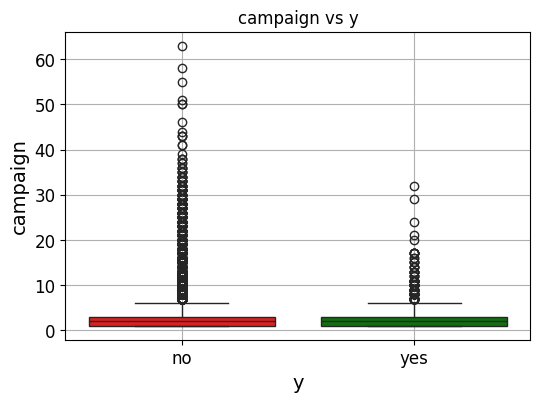

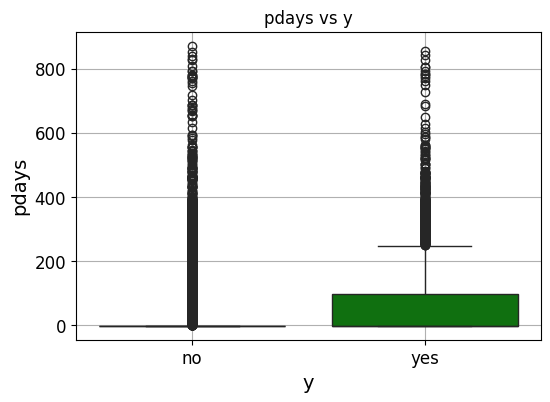

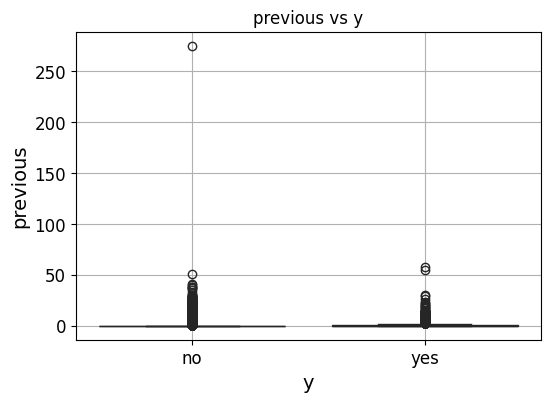

In [39]:
# 5. EDA

num_vars = ["age", "balance", "day", "campaign", "pdays", "previous"]

for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_bank, x="y", y=var, hue="y", palette={"no": "red", "yes": "green"})
    plt.title(f"{var} vs y")
    plt.grid(True)
    plt.show()

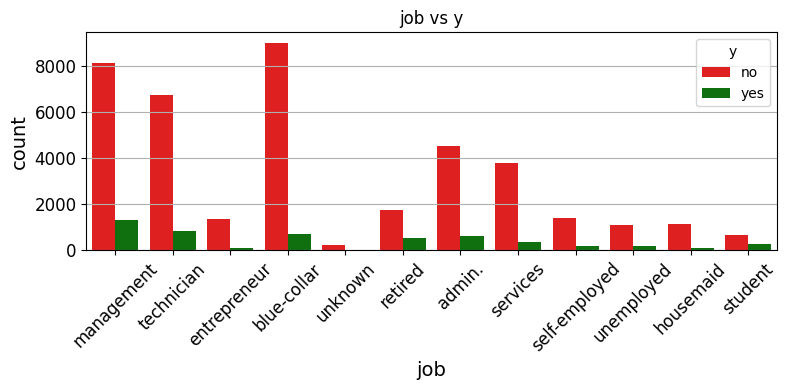

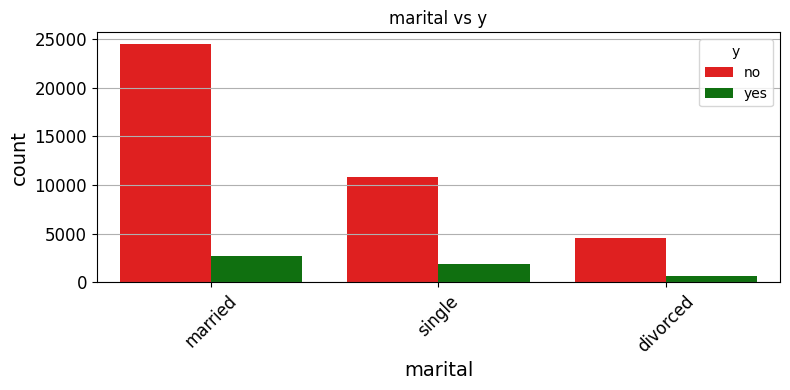

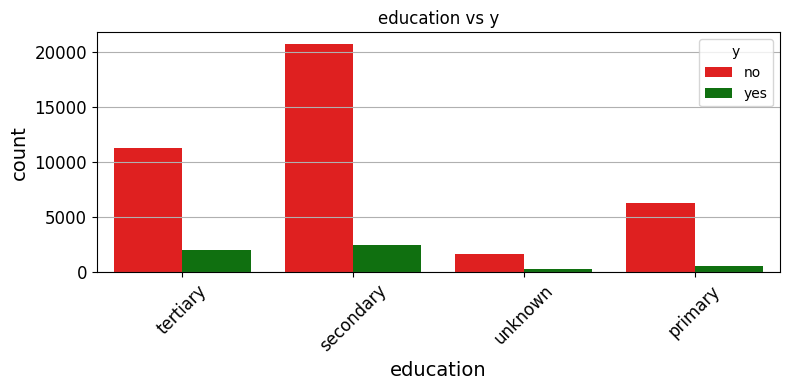

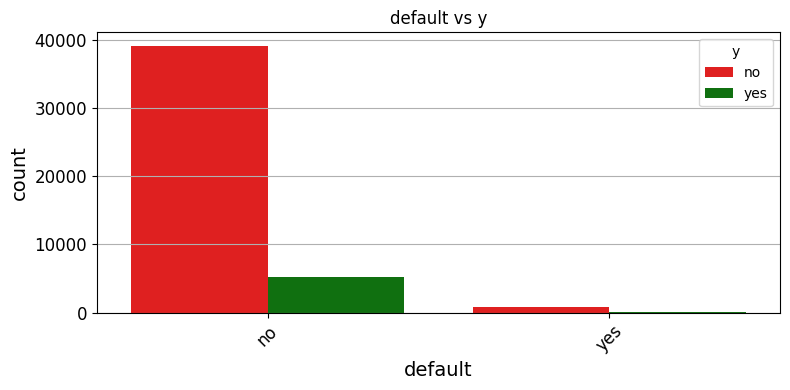

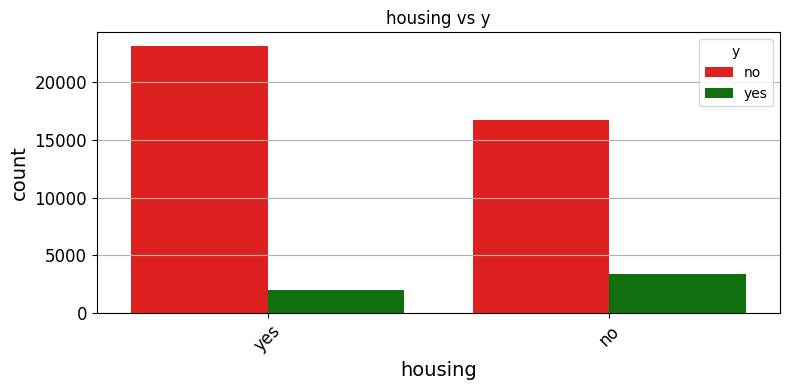

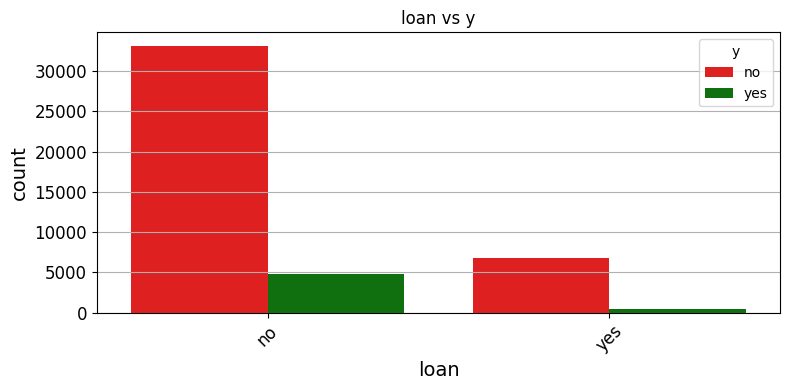

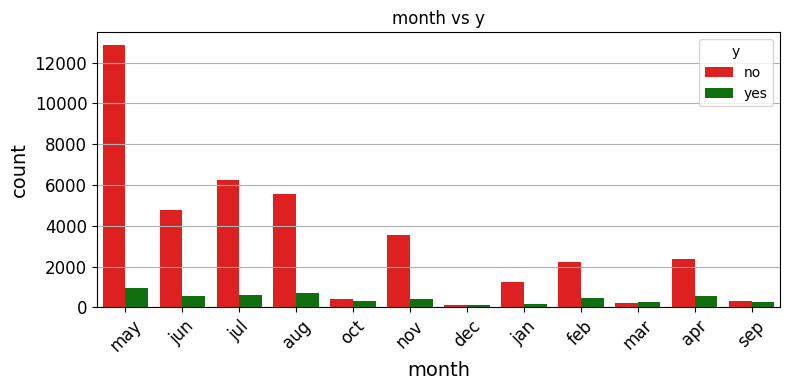

In [40]:
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "month"]

for var in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_bank, x=var, hue="y", palette={"no": "red", "yes": "green"})
    plt.title(f"{var} vs y")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

In [41]:
# 6. Selección de features y separacion X e y

# Teniendo en cuenta los gráficos y la propia descripción de las variables, vamos a eliminar en primer lugar
# duration pues es una variable que solo se conoce una vez que se ha podido contactar con el cliente
# Además, day, pdays, previous y campaign no parecen ser muy representativas y son algo complicadas
# al modelar y hacer en análisis. Así que finalmente me quedaré con:

# Variables a codificar
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "month"]

# Separamos
X_num = df_bank[["age", "balance"]]
X_cat = pd.get_dummies(df_bank[cat_vars], drop_first=True)

# Unimos
X = pd.concat([X_num, X_cat], axis=1)
y = df_bank["y"].map({"no": 0, "yes": 1})

=== Classification Report (Baseline Regresión Logística) ===
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7985
           1       0.50      0.08      0.13      1058

    accuracy                           0.88      9043
   macro avg       0.69      0.53      0.53      9043
weighted avg       0.84      0.88      0.84      9043



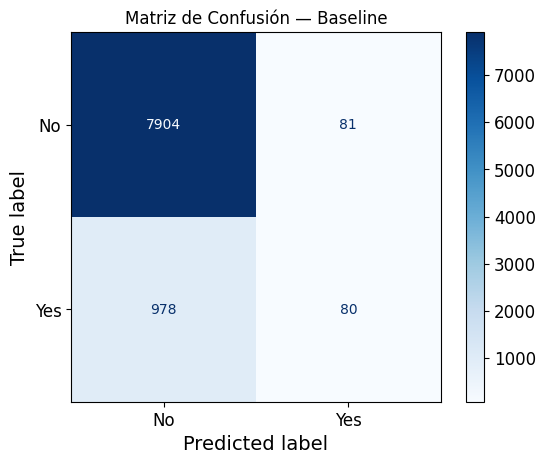

In [42]:
# 7. Split y regresión logística

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo baseline
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

# Predicciones
y_pred = log_model.predict(X_test)

# Resultados
print("=== Classification Report (Baseline Regresión Logística) ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión — Baseline")
plt.show()


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

=== Clasificación Árbol Optimizado ===
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7985
           1       0.25      0.26      0.26      1058

    accuracy                           0.82      9043
   macro avg       0.57      0.58      0.58      9043
weighted avg       0.83      0.82      0.82      9043



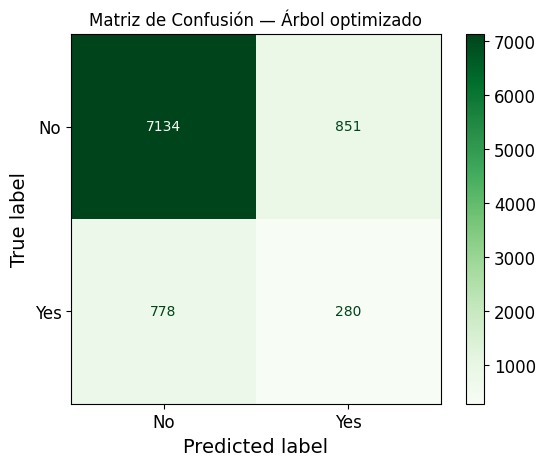

In [43]:
# 8. Árbol y optimización de hiperparámetros

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definimos el modelo base
tree = DecisionTreeClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV con validación cruzada
grid_tree = GridSearchCV(estimator=tree, param_grid=param_grid,
                         cv=5, scoring="f1", n_jobs=-1, verbose=1)

# Entrenamiento
grid_tree.fit(X_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros:", grid_tree.best_params_)

# Evaluación en test
y_pred_tree = grid_tree.predict(X_test)

print("\n=== Clasificación Árbol Optimizado ===")
print(classification_report(y_test, y_pred_tree))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Greens")
plt.title("Matriz de Confusión — Árbol optimizado")
plt.show()


### Comparación de modelos

| Métrica                | Regresión Logística | Árbol Optimizado |
| ---------------------- | ------------------- | ---------------- |
| **Accuracy**           | 0.88                | 0.82             |
| **Recall clase "Yes"** | 0.08                | 0.26             |
| **F1-score "Yes"**     | 0.13                | 0.26             |
| **Precision "Yes"**    | 0.50                | 0.25             |


**Regresión logística (baseline)**:

Tiene una accuracy alta (0.88), pero está sesgada hacia la clase mayoritaria ("No").

Su recall para la clase positiva ("Yes") es solo 0.08, lo cual es bastante negativo si queremos detectar clientes que sí que suscriben el depósito. Ignora a casi todos los clientes que dirían "sí".

**Árbol de decisión optimizado**:

Baja algo la accuracy global (0.82), pero mejora notablemente la capacidad de detectar "Yes":

Recall pasa de 0.08 → 0.26

F1 pasa de 0.13 → 0.26

Esto implica que aunque se equivoca más en general, captura mejor a quienes realmente contratarían el producto.

Por tanto si queremos detectar oportunidades de venta reales (la clase minoritaria), el árbol optimizado es mucho más útil, aunque tenga una accuracy ligeramente menor.